In [15]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [132]:
data2d = pd.read_csv('data/data2D.csv', header=None)
data1000d = pd.read_csv('data/data1000D.csv', header=None)
data2d = np.array(data2d)
data1000d = np.array(data1000d)

In [172]:
def buggy_PCA(data, d):
    # take SVD of data matrix, 
    U, S, V = np.linalg.svd(data)

    # right singular vectors of data form principal component matrix
    pc = V.T[:, :d]
    pca_data = np.dot(data, pc)

    # reconstruct the data from the reduced representation
    reconstructed_data = np.dot(pca_data, pc.T)

    # calculate the reconstruction error
    reconstruction_error = np.mean(np.sum((data - reconstructed_data)**2, axis=1)) 
    
    return pc, pca_data, reconstructed_data, reconstruction_error

In [173]:
def demeaned_PCA(data, d):
    # center data first
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    # take SVD of data matrix, 
    U, S, V = np.linalg.svd(centered_data)

    # right singular vectors of data form principal component matrix
    pc = V.T[:, :d]
    pca_data = np.dot(centered_data, pc)

    # reconstruct the data from the reduced representation
    reconstructed_data = np.dot(pca_data, pc.T) + mean

    # calculate the reconstruction error
    reconstruction_error = np.mean(np.sum((data - reconstructed_data)**2, axis=1)) 
    
    return pc, pca_data, reconstructed_data, reconstruction_error

In [174]:
def normalized_PCA(data, d):
    # center data first
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    # divide each dim by standard deviation
    std = np.std(centered_data, axis=0)
    scaled_data = centered_data / std 

    # take SVD of data matrix, 
    U, S, V = np.linalg.svd(scaled_data)

    # right singular vectors of data form principal component matrix
    pc = V.T[:, :d]
    pca_data = np.dot(scaled_data, pc)

    # reconstruct the data from the reduced representation
    reconstructed_data = np.dot(pca_data, pc.T) * std + mean

    # calculate the reconstruction error
    reconstruction_error = np.mean(np.sum((data - reconstructed_data)**2, axis=1)) 
    
    return pc, pca_data, reconstructed_data, reconstruction_error

In [257]:
def DRO(X, d):
    n, D = X.shape

    X_centered = X - np.mean(X, axis=0)

    # Compute the SVD of the data matrix
    U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Compute the top d right singular vectors of the data matrix
    A = Vt[:d].T

    # Project the data onto the subspace spanned by A
    Z = np.dot(X, A)

    # Compute the mean of Z
    mu = np.mean(Z, axis=0)

    # Center Z
    Z_centered = Z - mu

    # Solve for b
    b = np.mean(X, axis=0) - np.dot(mu, A.T)

    # Compute the reconstructions of Z in D dimensions
    X_recon = np.dot(Z_centered, A.T) + np.mean(X, axis=0)

    # Compute the reconstruction error
    reconstruction_error = np.mean(np.sum((X - X_recon)**2, axis=1)) 
    
    return Z, A, b, X_recon, reconstruction_error

In [258]:
print(f'The reconstruction error for Buggy PCA on data2d is {buggy_PCA(data2d, d=1)[-1]}.') 
print(f'The reconstruction error for Demeaned PCA on data2d is {demeaned_PCA(data2d, d=1)[-1]}.') 
print(f'The reconstruction error for Normalized PCA on data2d is {normalized_PCA(data2d, d=1)[-1]}.') 
print(f'The reconstruction error for DRO on data2d is {DRO(data2d, d=1)[-1]}.') 

The reconstruction error for Buggy PCA on data2d is 0.8869030837347941.
The reconstruction error for Demeaned PCA on data2d is 0.010006085628512908.
The reconstruction error for Normalized PCA on data2d is 0.04947208345477067.
The reconstruction error for DRO on data2d is 0.010006085628512915.


In [144]:
def plot_reconstructions(data, reconstructed_data, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data[:, 0], data[:, 1], label='original data')
    ax.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='reconstructed data')
    plt.grid()
    plt.legend()
    plt.title(title)
    save_str = title + '.pdf'
    plt.savefig(save_str)
    plt.show()
    

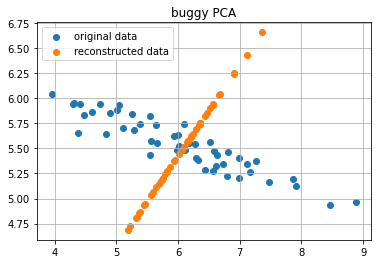

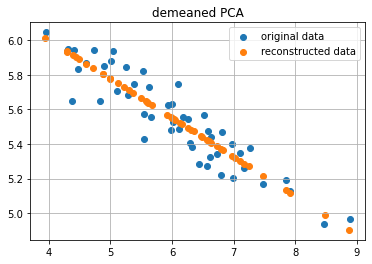

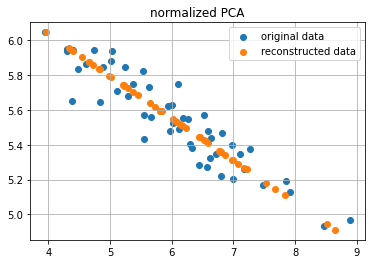

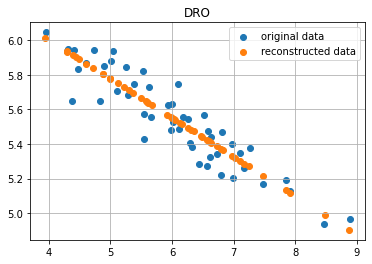

In [262]:
plot_reconstructions(data2d, buggy_PCA(data2d, d=1)[2], title='buggy PCA')
plot_reconstructions(data2d, demeaned_PCA(data2d, d=1)[2], title='demeaned PCA')
plot_reconstructions(data2d, normalized_PCA(data2d, d=1)[2], title='normalized PCA')
plot_reconstructions(data2d, DRO(data2d, d=1)[3], title='DRO')

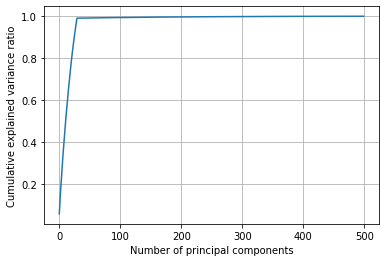

In [202]:
from sklearn.decomposition import PCA

# Compute PCA
pca = PCA()
pca.fit(data1000d)

# Compute explained variance ratios
explained_variances = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
cumulative_variances = np.cumsum(explained_variances)
plt.plot(cumulative_variances)
plt.grid()
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.savefig('choosed.pdf')
plt.show()


In [256]:
print(f'The reconstruction error for Buggy PCA on data1000d is {buggy_PCA(data1000d, d=30)[-1]}.') 
print(f'The reconstruction error for Demeaned PCA on data1000d is {demeaned_PCA(data1000d, d=30)[-1]}.') 
print(f'The reconstruction error for Normalized PCA on data1000d is {normalized_PCA(data1000d, d=30)[-1]}.') 
print(f'The reconstruction error for DRO on data1000d is {DRO(data1000d, d=30)[-1]}.') 

The reconstruction error for Buggy PCA on data1000d is 802.7313986203584.
The reconstruction error for Demeaned PCA on data1000d is 273.0459589786028.
The reconstruction error for Normalized PCA on data1000d is 273.62858099762326.
The reconstruction error for DRO on data1000d is 273.0459589786028.
